<a href="https://colab.research.google.com/github/alessandropessoa/ciencia-de-Dados/blob/main/classificacaiMulticlasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install skorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.3/221.3 kB 4.1 MB/s eta 0:00:00


In [4]:
from torch import nn,optim
import pandas as pd
import numpy as np
from skorch import NeuralNetBinaryClassifier
from sklearn.model_selection import cross_val_score # validação cruzada
import torch
import seaborn as sns
from torch.nn import functional as F
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


#Usaremos o dataset Iris para os testes com as redes neurais densas multiclasses.

Utilizaremos programação funcional afim de ser mais celere

In [5]:
np.random.seed(27)
torch.random.manual_seed(27)



In [6]:
dataset = pd.read_csv('/content/Iris.csv')

In [7]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
dsPreditores = dataset[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
dsPreditores


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
dsPreditores =dsPreditores.to_numpy()

In [10]:
dsAlvo = dataset['Species']
dsAlvo

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [11]:
dsAlvo = dsAlvo.to_numpy()

In [ ]:
# como o nosso objetivo é realizar a classficação entre 3 tipos de rotulos,
#'setosa', 'versicolor', 'virginica', teremos que ter 3 neuronios na saida
# as variaveis explanatorias (preditoras ou independentes) são sepal length,sepal width ,petal length
#petal width




A arquitetura da rede neural será
4 -> 4 ->4 ->3 pois 4+3/2 = 3.5 ≃ 4 neuronios

In [12]:
#Podemos observar que a camda de saida não contem uma função de ativação
#pois esta será passada na etapa de treino

classificador = nn.Sequential(
                              #camada de entrada
                              nn.Linear(4,4),\
                              nn.ReLU(),\

                              #camada oculta
                              nn.Linear(4,4),\
                              nn.ReLU(),\

                              #camada de saida
                              nn.Linear(4,3),\

)



In [13]:
#Para esse calculo de erro não utilizaremos o BCELoss (Binary Cross Entropy)
#pois a nossa classificação não é binaria e sim multiclasse

criterion = nn.CrossEntropyLoss()

In [14]:
otimizador = optim.Adam(classificador.parameters(),lr=.001, weight_decay=.0001)

<Axes: ylabel='count'>

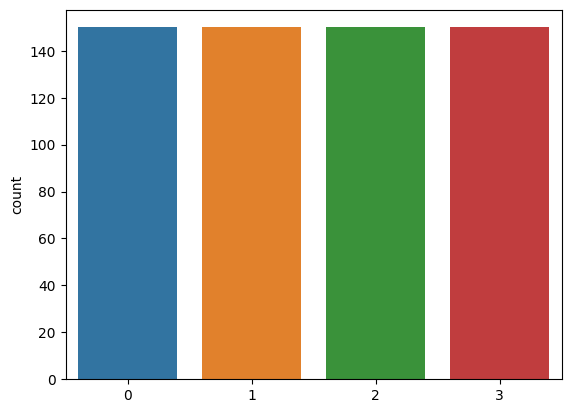

In [15]:
sns.countplot(dsPreditores) #preditores


<Axes: ylabel='count'>

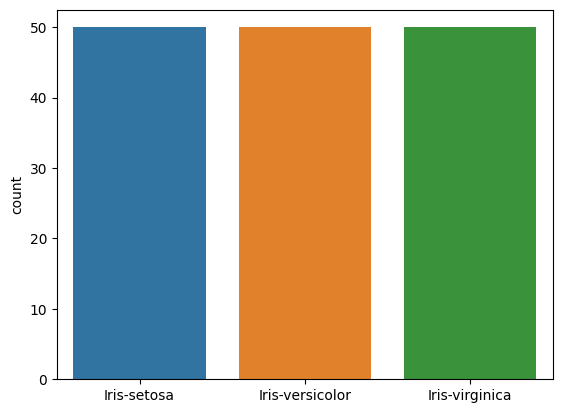

In [16]:
sns.countplot(x=dsAlvo) #variaveis alvo

In [17]:
#podemos perceber que os encoders serão 0= setosa , 1=versicolor e 2=virginica

encoder = LabelEncoder()
dsAlvo_encoder = encoder.fit_transform(dsAlvo)
dsAlvo_encoder

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
preditoresTreinamento, preditoresTeste, alvoTreinamento,alvoTeste = train_test_split(dsPreditores,dsAlvo_encoder,test_size=.25)

In [19]:
preditoresTreinamento.shape

(112, 4)

In [20]:
preditoresTeste.shape

(38, 4)

In [21]:
tensor_preditoresTreinamento = torch.tensor(preditoresTreinamento,dtype=torch.float)
tensor_preditoresTreinamento

tensor([[5.8000, 2.7000, 3.9000, 1.2000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [6.3000, 2.9000, 5.6000, 1.8000],
        [5.9000, 3.2000, 4.8000, 1.8000],
        [7.2000, 3.2000, 6.0000, 1.8000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [6.0000, 2.9000, 4.5000, 1.5000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [7.4000, 2.8000, 6.1000, 1.9000],
        [6.1000, 2.9000, 4.7000, 1.4000],
        [5.0000, 3.5000, 1.6000, 0.6000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [5.1000, 3.5000, 1.4000, 0.2000],
        [5.5000, 2.4000, 3.8000, 1.1000],
        [5.2000, 3.5000, 1.5000, 0.2000],
        [6.3000, 2.3000, 4.4000, 1.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [6.7000, 3.1000, 5.6000, 2.4000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.3000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [6.2000, 2.8000, 4.8000, 1

In [29]:
torch.cuda.device_count()

1

In [30]:
torch.cuda.current_device()

0

In [31]:
torch.cuda.device(0)

In [32]:
torch.cuda.get_device_name(0)

'Tesla T4'

In [33]:
tensor_alvoTreinamento = torch.tensor(alvoTreinamento,dtype=torch.long,device='cuda')
tensor_alvoTreinamento

tensor([1, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 2,
        1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 2, 2, 0, 2, 0, 1,
        2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1,
        2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0,
        1, 0, 1, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0], device='cuda:0')

In [37]:

datasetTensor = torch.utils.data.TensorDataset(tensor_preditoresTreinamento,tensor_alvoTreinamento)
train_loader = torch.utils.data.DataLoader(datasetTensor, batch_size=10, shuffle=True)

In [38]:
len(datasetTensor.tensors[0]),datasetTensor.tensors[1]

(112,
 tensor([1, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 2,
         1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 2, 2, 0, 2, 0, 1,
         2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1,
         2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0,
         1, 0, 1, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0], device='cuda:0'))

In [54]:
for epoca in range(10000):
  acumuladorErro = 0
  acuracia = 0
  for data in train_loader:
    preditores , alvo = data

    otimizador.zero_grad()

    saida = classificador.forward(preditores).to('cuda')
    erro  = criterion(saida, alvo)
    erro.backward()

    #como não foi definida uma camada de ativação na saida de nosso classificador multiclasse
    #usaremos a função de ativação softmax que retorna a probabilidade de pertencer a cada uma das classses

    saida =  F.softmax(saida)
    top_p , top_alvo = saida.topk(k=1, dim=1) # o parametro k com valor um retorna a classe com maior probabilidade e dim =1 quer dizer quer cada pergaremos por coluna (cada registro), pois emo colunas alvo setosa, virgina e versivolor

    comparador = top_alvo == alvo.view(*top_alvo.shape) # se o valor da classificação top_alvo for igual ao resultado da base de dados retorna True
    acuracia += torch.mean(comparador.type(torch.float))

    otimizador.step() #atualiza os pesos

    acumuladorErro += erro.item()
  print("Epoca %3d: perda %.5f - acuracia %.5f "%(epoca+1, acumuladorErro/len(train_loader), acuracia/len(train_loader)))


<ipython-input-54-bc22ef52f9c6>:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  saida =  F.softmax(saida)


Epoca   1: perda 0.55820 - acuracia 0.75000 
Epoca   2: perda 0.54437 - acuracia 0.75000 
Epoca   3: perda 0.55302 - acuracia 0.71667 
Epoca   4: perda 0.55082 - acuracia 0.72500 
Epoca   5: perda 0.53965 - acuracia 0.78333 
Epoca   6: perda 0.54736 - acuracia 0.72500 
Epoca   7: perda 0.53019 - acuracia 0.77500 
Epoca   8: perda 0.54084 - acuracia 0.73333 
Epoca   9: perda 0.52731 - acuracia 0.77500 
Epoca  10: perda 0.53428 - acuracia 0.74167 
Epoca  11: perda 0.53315 - acuracia 0.75000 
Epoca  12: perda 0.54997 - acuracia 0.70833 
Epoca  13: perda 0.52894 - acuracia 0.85833 
Epoca  14: perda 0.51546 - acuracia 0.86667 
Epoca  15: perda 0.51019 - acuracia 0.81667 
Epoca  16: perda 0.52147 - acuracia 0.74167 
Epoca  17: perda 0.50830 - acuracia 0.79167 
Epoca  18: perda 0.52478 - acuracia 0.75000 
Epoca  19: perda 0.51508 - acuracia 0.77500 
Epoca  20: perda 0.50075 - acuracia 0.84167 
Epoca  21: perda 0.51082 - acuracia 0.82500 
Epoca  22: perda 0.50673 - acuracia 0.79167 
Epoca  23:

KeyboardInterrupt: ignored

AVALIAÇÂO DO MODELO

In [56]:

classificador.eval()

Sequential(
  (0): Linear(in_features=4, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
)

In [57]:
tensor_preditoresTeste  =  torch.tensor(preditoresTeste,dtype=torch.float)


In [58]:
classificacoes = classificador(tensor_preditoresTeste)

In [59]:
classificacoes

tensor([[-13.9070,   0.4187,   6.2804],
        [ 17.1312,   4.8397, -12.1804],
        [-15.9559,  -2.0113,  10.3179],
        [-18.2403,  -2.6095,  12.4630],
        [ -4.7899,   6.0228,  -4.9790],
        [ -5.4101,   6.5784,  -5.1661],
        [ -7.2328,   6.5113,  -4.4435],
        [-15.5798,  -1.9120,   9.9638],
        [-11.0526,   4.4409,  -0.0482],
        [ 15.0720,   4.6786, -11.3001],
        [ -6.2273,   6.0732,  -4.4864],
        [-10.5655,   4.5862,  -0.5315],
        [ 15.1642,   4.3525, -11.0900],
        [ -6.4756,   6.0843,  -4.4032],
        [ -6.3938,   6.8077,  -4.9749],
        [ -4.0363,   5.9588,  -5.2091],
        [ 15.5184,   4.5660, -11.3805],
        [-16.6784,  -2.2021,  10.9981],
        [-15.3549,  -1.8526,   9.7521],
        [-18.4790,  -2.6777,  12.6933],
        [ -5.7888,   6.7919,  -5.1863],
        [ 15.4699,   4.4743, -11.2940],
        [ -6.9131,   6.2381,  -4.3569],
        [ 15.2471,   4.9310, -11.5536],
        [-15.9050,  -1.9979,  10.2699],


In [61]:
# vai retornar a probabilidade de pertencer a cada classe alvo, 0='setosa', 1 ='versicolor', 2='virginica', lembrando qie o indice
#correponde a cada classe , indice 0 classe setosa., indice 1 versicolor, indice 2 virginica
classificaoes_porClasse = F.softmax(classificacoes)

<ipython-input-61-20ea878893e2>:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  classificaoes_porClasse = F.softmax(classificacoes)


In [62]:
classificaoes_porClasse

tensor([[1.7042e-09, 2.8383e-03, 9.9716e-01],
        [1.0000e+00, 4.5908e-06, 1.8627e-13],
        [3.8851e-12, 4.4205e-06, 1.0000e+00],
        [4.6315e-14, 2.8451e-07, 1.0000e+00],
        [2.0141e-05, 9.9996e-01, 1.6672e-05],
        [6.2149e-06, 9.9999e-01, 7.9324e-06],
        [1.0740e-06, 9.9998e-01, 1.7474e-05],
        [8.0646e-12, 6.9571e-06, 9.9999e-01],
        [1.8468e-07, 9.8889e-01, 1.1106e-02],
        [9.9997e-01, 3.0633e-05, 3.5217e-12],
        [4.5496e-06, 9.9997e-01, 2.5943e-05],
        [2.6126e-07, 9.9405e-01, 5.9537e-03],
        [9.9998e-01, 2.0162e-05, 3.9622e-12],
        [3.5098e-06, 9.9997e-01, 2.7882e-05],
        [1.8479e-06, 9.9999e-01, 7.6369e-06],
        [4.5618e-05, 9.9994e-01, 1.4120e-05],
        [9.9998e-01, 1.7516e-05, 2.0794e-12],
        [9.5561e-13, 1.8502e-06, 1.0000e+00],
        [1.2478e-11, 9.1231e-06, 9.9999e-01],
        [2.8978e-14, 2.1108e-07, 1.0000e+00],
        [3.4379e-06, 9.9999e-01, 6.2798e-06],
        [9.9998e-01, 1.6774e-05, 2

In [63]:
classificavoes_np = [np.argmax(t) for t in classificaoes_porClasse.detach().numpy()]

In [64]:
classificavoes_np

[2,
 0,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 0,
 1,
 0,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 2]

In [50]:
len(classificavoes_np)

38

In [65]:
matrizConfusao = confusion_matrix(classificavoes_np, alvoTeste)

In [66]:
matrizConfusao

array([[ 9,  0,  0],
       [ 0, 14,  2],
       [ 0,  0, 13]])

<Axes: >

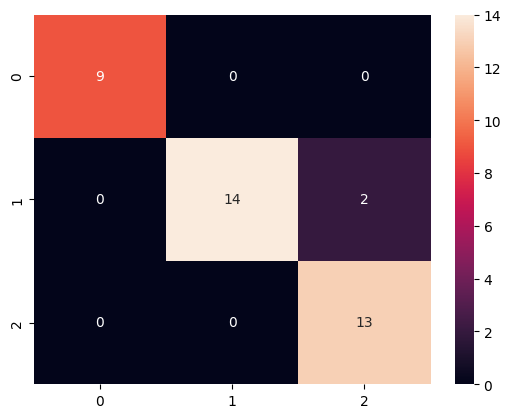

In [67]:
sns.heatmap(matrizConfusao,annot=True)